# Use OSMnx to topologically correct and simplify street networks

In [1]:
import osmnx as ox
%matplotlib inline

In [2]:
ox.config(log_file=True, log_console=True, use_cache=True)

## Create a street network and then simplify it

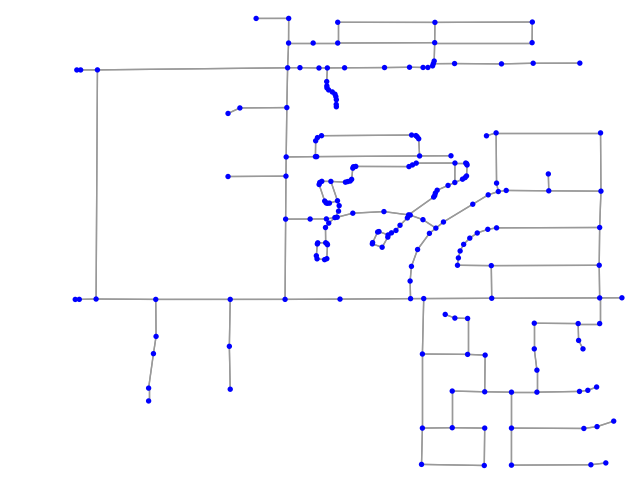

In [3]:
# create a network around some (lat, lon) point and plot it
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, distance=500, simplify=False)
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

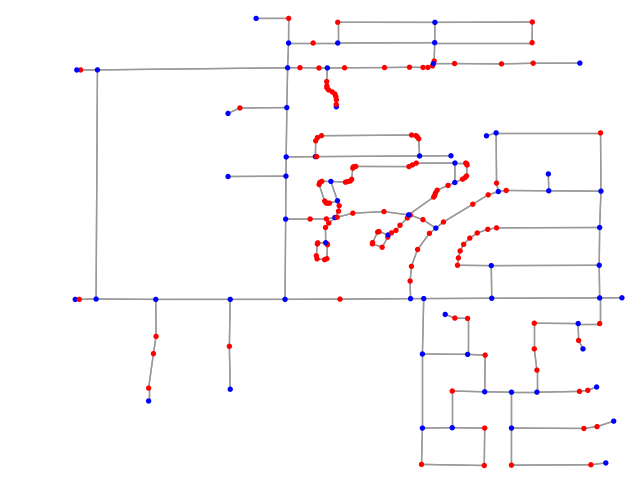

In [4]:
# show which nodes we'd remove if we simplify it
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [5]:
# simplify the network
G2 = G.copy()
G2 = ox.simplify_graph(G2)

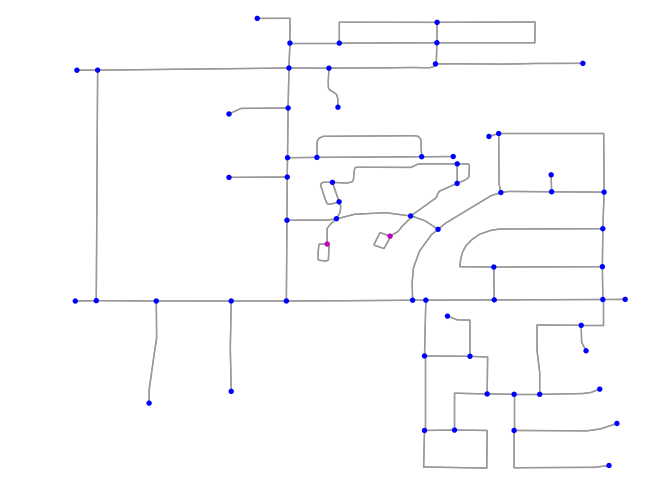

In [6]:
# plot the simplified network and show any loops in magenta
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc, node_zorder=3)

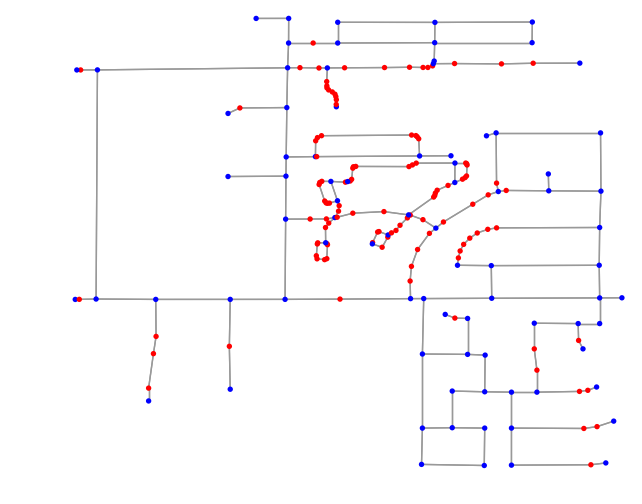

In [7]:
# turn off strict mode and see what nodes we'd remove
nc = ['b' if ox.is_endpoint(G, node, strict=False) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

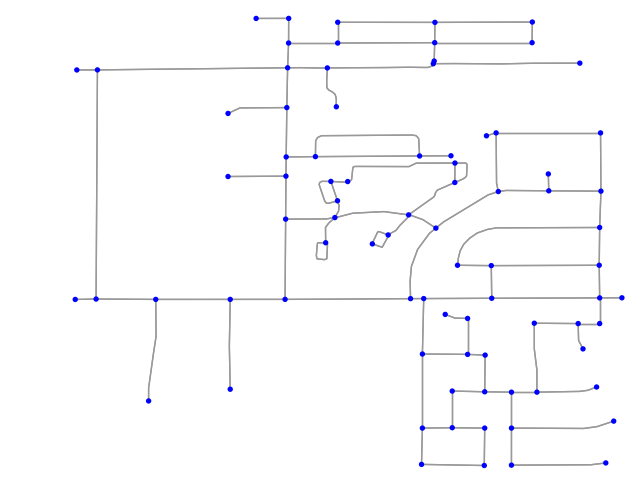

In [8]:
# simplify network with strict mode turned off
G3 = G.copy()
G3 = ox.simplify_graph(G3, strict=False)
fig, ax = ox.plot_graph(G3, node_color='b', node_zorder=3)

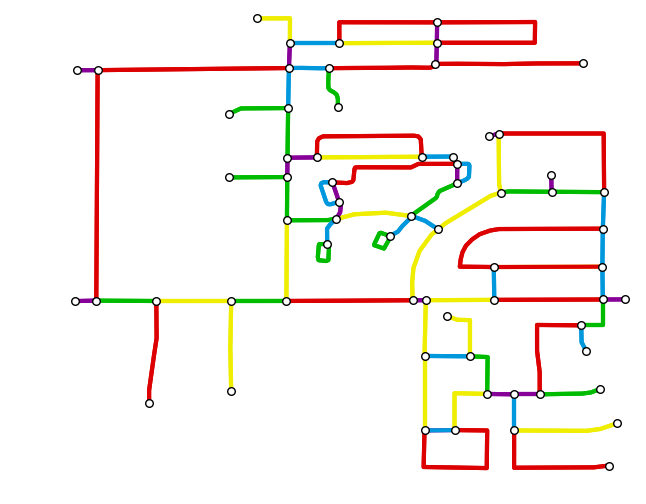

In [9]:
# show the strictly simplified network with edges colored by network length
ec = ox.get_edge_colors_by_attr(G2, attr='length')
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, edge_color=ec, edge_linewidth=3)

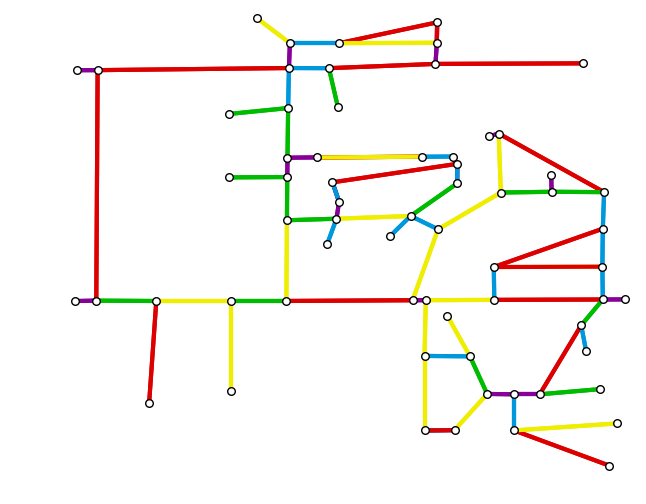

In [10]:
# plot same network again (topologically isomorphic), this time ignoring the edges' spatial geometry
ec = ox.get_edge_colors_by_attr(G2, attr='length')
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, 
                           edge_color=ec, edge_linewidth=3, edge_alpha=1, use_geom=False)

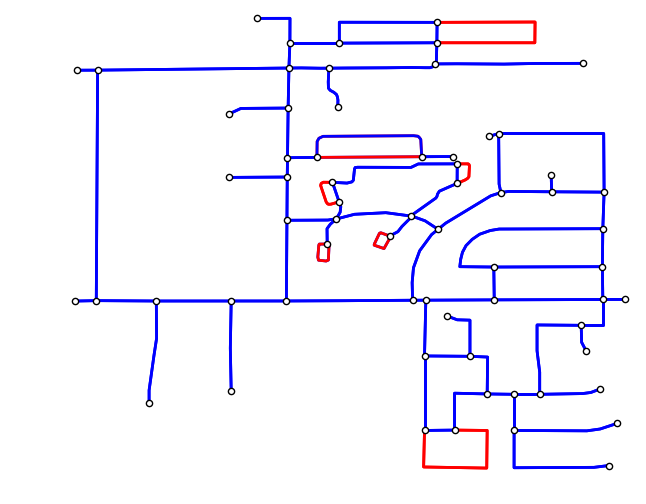

In [11]:
# highlight all parallel edges
ec = ['b' if key == 0 else 'r' for u, v, key in G2.edges(keys=True)]
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=20, node_zorder=3, edge_color=ec, edge_linewidth=2)

## Create a 'drivable' street network for downtown SF then simplify it

In [12]:
location_point = (37.791427, -122.410018)
G = ox.graph_from_point(location_point, distance=1500, network_type='drive', simplify=False)

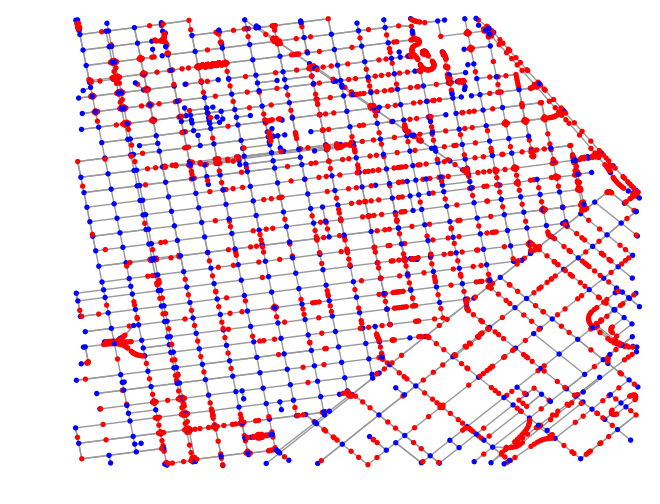

In [13]:
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [14]:
G2 = G.copy()
G2 = ox.simplify_graph(G2)

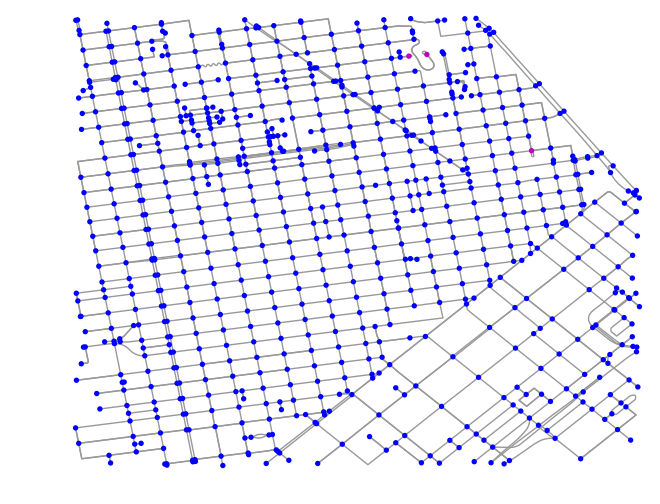

In [15]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc, node_zorder=3)

## Create another suburban street network, then simplify it

In [16]:
G = ox.graph_from_address('N. Corsica Pl., Chandler, Arizona', 
                             distance=800, network_type='drive', simplify=False)

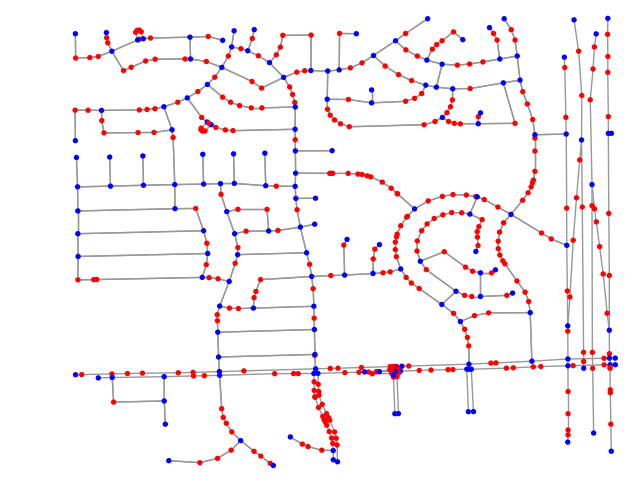

In [17]:
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [18]:
G2 = G.copy()
G2 = ox.simplify_graph(G2)

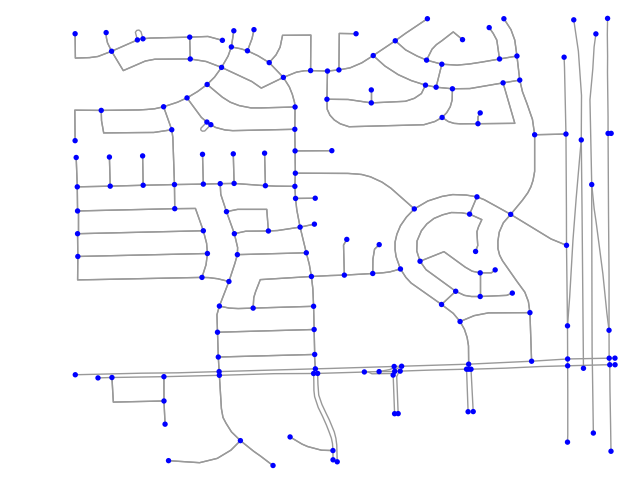

In [19]:
fig, ax = ox.plot_graph(G2, node_color='b', node_zorder=3)

In [20]:
# save as ESRI shapefile
ox.save_graph_shapefile(G2, filename='arizona')

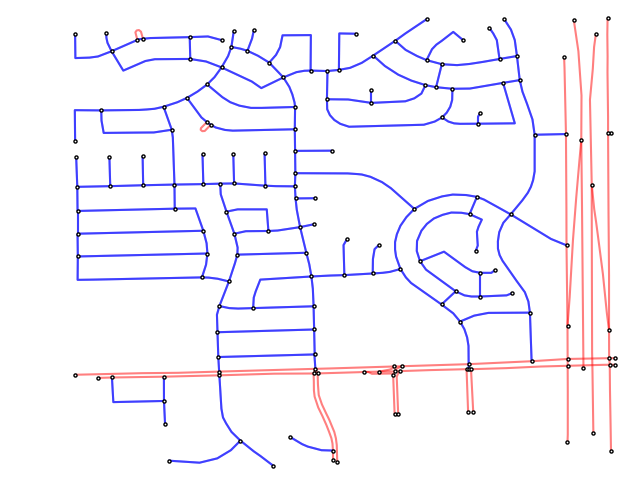

In [21]:
# highlight one-way streets
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G2.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=5, node_zorder=3, 
                           edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)

## Create a drivable street network for all of Oakland then simplify it

In [22]:
G = ox.graph_from_place('Oakland, California, USA', network_type='drive', simplify=False)

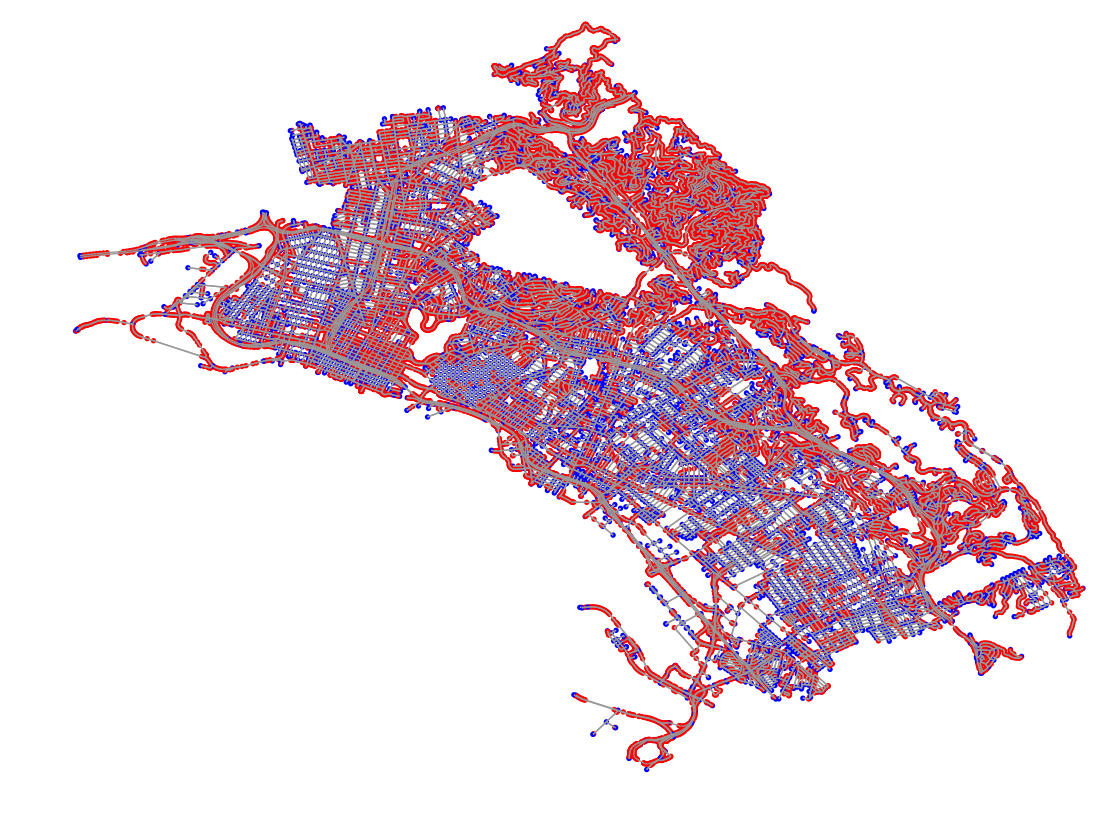

In [23]:
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=10, node_color=nc)

In [24]:
G2 = G.copy()
G2 = ox.simplify_graph(G2)

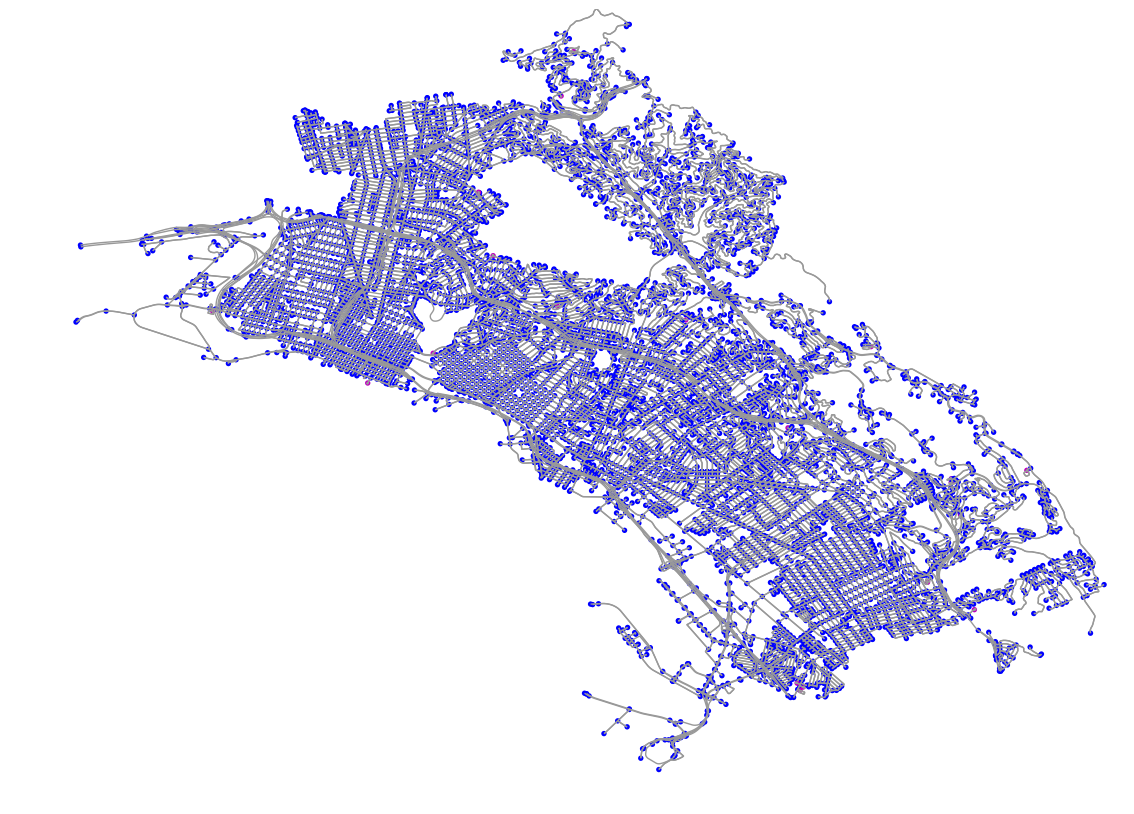

In [25]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, fig_height=10, node_color=nc)

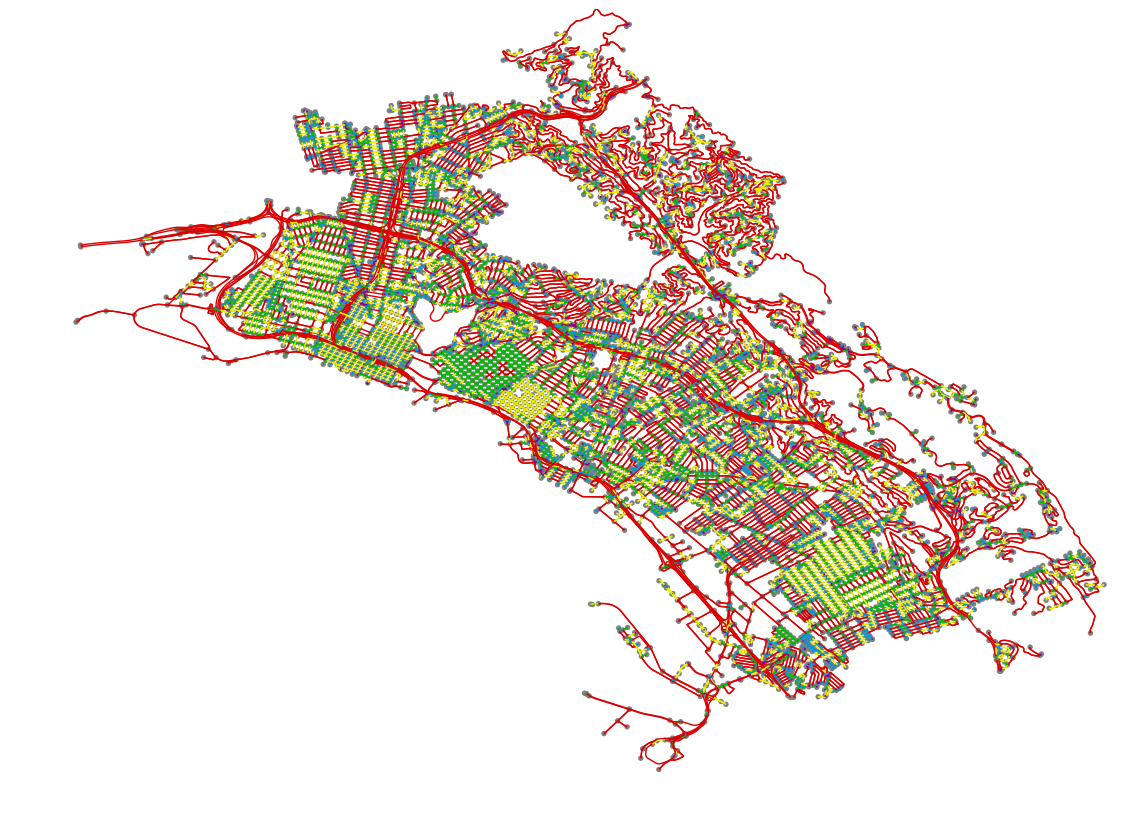

In [26]:
ec = ox.get_edge_colors_by_attr(G2, attr='length')
fig, ax = ox.plot_graph(G2, fig_height=10, node_color='gray', edge_color=ec, save=True, filename='oak-color')